# 这个一个用于计算差分格式系数的小程序
用泰勒展开构建差分格式
Step1: 确定基架点

差分基架点：计算j点导数需要使用的点

根据计算量、精度需求等要求而定

Step2: 泰勒展开
$$
u_{j+k} = u_j + \sum_i \left(\frac{\partial^i u}{\partial x^i}\right)_j \frac{(k\Delta x)^i}{i!}
$$

需要满足

$$
u^{'} = \sum_i u_i a_i
$$

构建矩阵，假设基架点从左边第k个点开始，一共n个基架点

$$
A = 
\begin{bmatrix} 
1 & -k & \frac{(-k)^2}{2!} & \frac{(-k)^3}{3!} & \cdots & \frac{(-k)^{n-1}}{(n-1)!}\\
1 & (-k+1) & \frac{(-k+1)^2}{2!} & \frac{(-k+1)^3}{3!} & \cdots & \frac{(-k+1)^{n-1}}{(n-1)!}\\
\vdots && \ddots &&& \vdots \\
1 & (-k+n) & \frac{(-k+n)^2}{2!} & \frac{(-k+n)^3}{3!} & \cdots & \frac{(-k+n)^{n-1}}{(n-1)!}\\
\end{bmatrix}
$$

$$
x = 
\begin{bmatrix} 
a_1 & a_2 & \cdots a_n
\end{bmatrix} \\
对于一阶导数
b = 
\begin{bmatrix} 
0 & \frac{1}{\Delta x} & \cdots & 0
\end{bmatrix} 
对于n阶段导数
b[n] = \frac{1}{\Delta x^n}
\\
A^T \cdot x = b 
所以系数\\
x = (A^T)^{-1} \cdot b
$$

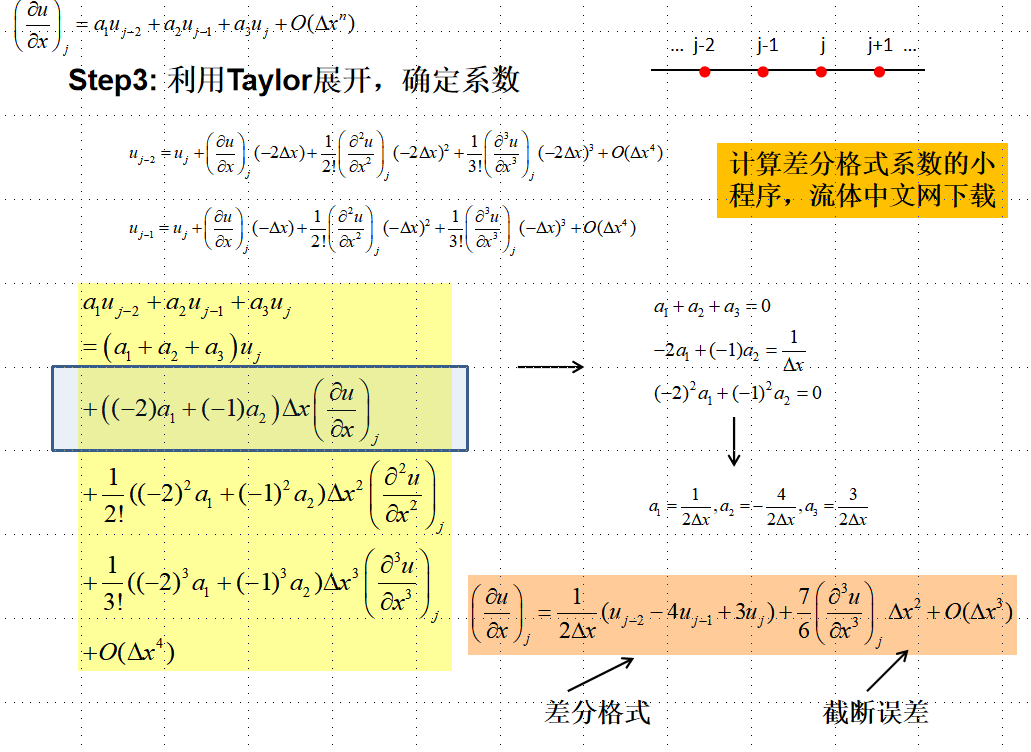

In [1]:
import numpy as np

In [2]:
#num代表有几个插值点，start代表从基准点左边的第几个开始，order是所求插值方法是要计算几阶的导数，mul是最后的结果要乘上一个系数，让结果能够用分数表达出来
def func(num, start, order=1, mul = 1): 
    #如果插值点的个数不满足所要计算的阶数，直接返回
    if(order > num-1):
        print("Do not have enough points!")
        return
    #用泰勒展开求解系数的值
    A = np.zeros((num, num))
    for j in range(num):
        for i in range(num):
            A[i, j] = (-start + j)**i / np.math.factorial(i)
    b = np.zeros((num, 1))
    b[order][0] = 1
    #系数
    a = np.matmul(np.linalg.inv(A), b)
    #误差的阶数
    print("error = O(Δx**", num-1 ,")\ncof = ")
    #输出系数的值
    for i in range(num):
        print("\ta",i, "=", a[i][0], "/Δx", end="")
        if i != num - 1:
            print(",")
        else:
            print("\n")
    
    #输出是几阶的离散
    k = ['\'' for i in range(order)]
    k_ = ""
    for i in k:
        k_ = k_ + i
    print("f", k_, "_i = ", end='', sep = "")
    #输出离散表达式
    for i in range(num):
        a_ = a[i][0] * mul;
        if abs(a_ - round(a_)) < 1e-5:
            a_ = round(a_)
        if(i != 0):
            print("\t"*1, end="")
        if(-start + i < 0):
            print("f_(i", (-start+i), ") * ", a_, "/(", mul, "Δx^", order, ")", sep="",end='')
        elif(-start + i > 0):
            print("f_(i+", (-start+i), ") * ", a_, "/(", mul, "Δx^", order, ")", end='', sep="")
        else:
            print("f_(i） * ", a_, "/(", mul, "Δx^", order, ")", end='', sep = "")
        
        if i != num -1:
            print(" + ")
        else:
            print("\n")
        
    return a


In [3]:
print("4阶中心格式")
a = func(5, 2, 1, 12)#4阶中心格式
print("3阶迎风格式")
a = func(4, 2, 1, 6)#3阶迎风格式

4阶中心格式
error = O(Δx** 4 )
cof = 
	a 0 = 0.08333333333333326 /Δx,
	a 1 = -0.6666666666666665 /Δx,
	a 2 = 0.0 /Δx,
	a 3 = 0.6666666666666665 /Δx,
	a 4 = -0.08333333333333327 /Δx

f'_i = f_(i-2) * 1/(12Δx^1) + 
	f_(i-1) * -8/(12Δx^1) + 
	f_(i） * 0/(12Δx^1) + 
	f_(i+1) * 8/(12Δx^1) + 
	f_(i+2) * -1/(12Δx^1)

3阶迎风格式
error = O(Δx** 3 )
cof = 
	a 0 = 0.16666666666666652 /Δx,
	a 1 = -0.9999999999999996 /Δx,
	a 2 = 0.49999999999999956 /Δx,
	a 3 = 0.3333333333333335 /Δx

f'_i = f_(i-2) * 1/(6Δx^1) + 
	f_(i-1) * -6/(6Δx^1) + 
	f_(i） * 3/(6Δx^1) + 
	f_(i+1) * 2/(6Δx^1)



# 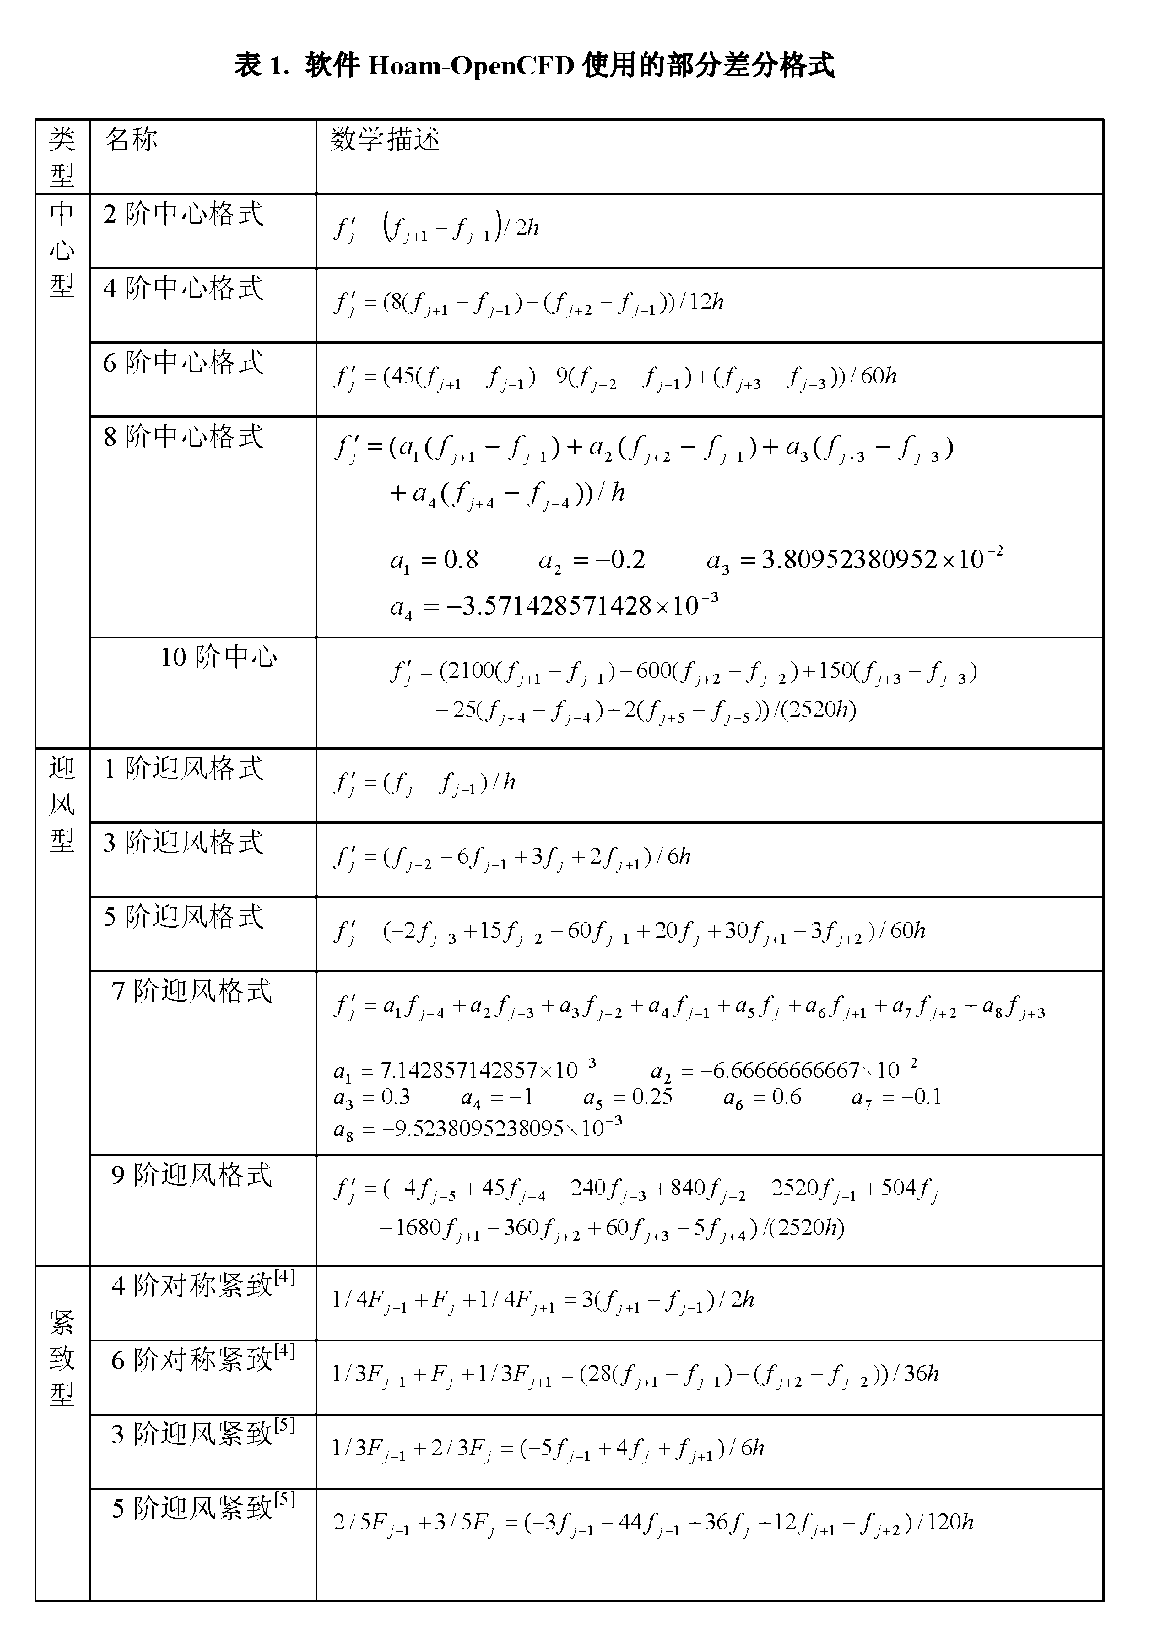